In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import math

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
y = data['Total Claim Amount']
X = data.drop(['Total Claim Amount'], axis=1)

In [4]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
cat_data = pd.get_dummies(X_cat, drop_first=True) # if you need to save the encoding info, this won't do
cat_data

C:\Users\PACOAL~1\AppData\Local\Temp/ipykernel_13696/3178221020.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X.select_dtypes(include = np.object)


,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
data["Total Claim Amount"].unique()

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [11]:
data_corr = data.corr()
data_corr

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [15]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [16]:
data1 = data[["Total Claim Amount", "Monthly Premium Auto" ]]
data1

,Total Claim Amount,Monthly Premium Auto
0,384.811147,69
1,1131.464935,94
2,566.472247,108
3,529.881344,106
4,138.130879,73
...,...,...
9129,198.234764,73
9130,379.200000,79
9131,790.784983,85
9132,691.200000,96


In [17]:
data1 = data1.dropna()
data1

,Total Claim Amount,Monthly Premium Auto
0,384.811147,69
1,1131.464935,94
2,566.472247,108
3,529.881344,106
4,138.130879,73
...,...,...
9129,198.234764,73
9130,379.200000,79
9131,790.784983,85
9132,691.200000,96


In [18]:
corr_data = data1.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman')
correlations_matrix

,Total Claim Amount,Monthly Premium Auto
Total Claim Amount,1.000000,0.522261
Monthly Premium Auto,0.522261,1.000000


In [19]:
data_corr[(data_corr['Total Claim Amount'] > 0.6) | (data_corr['Total Claim Amount'] < -0.6)][['Total Claim Amount', 'Monthly Premium Auto']]

,Total Claim Amount,Monthly Premium Auto
Monthly Premium Auto,0.632017,1.000000
Total Claim Amount,1.000000,0.632017


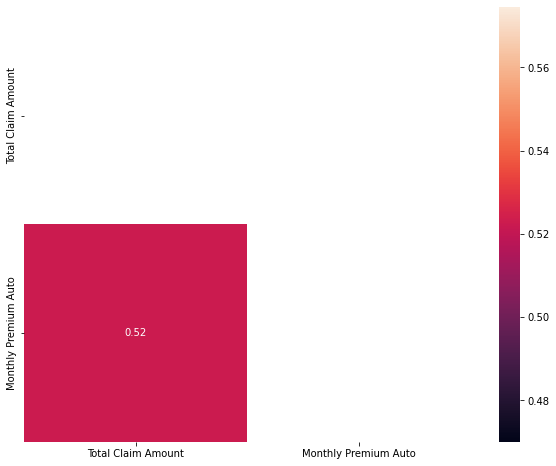

In [20]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [22]:
X = data1.drop(['Total Claim Amount'], axis=1)
y = data1['Total Claim Amount']


X = sm.add_constant(X)

model = sm.OLS(y,X,missing='drop').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Claim Amount   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     6074.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:33:44   Log-Likelihood:                -62436.
No. Observations:                9134   AIC:                         1.249e+05
Df Residuals:                    9132   BIC:                         1.249e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -63.3293      6.803     -9.309      0.000     -76.665     -49.993
Monthly Premium Auto     5.3360      0.068     77.935      0.000       5.202       5.470
==============================================================================
Omnibus:                      918.547   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4798.125
Skew:                           0.348   Prob(JB):                         0.00
Kurtosis:                       6.482   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = data1.drop(['Total Claim Amount'], axis=1)
y = data1['Total Claim Amount']

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False)
mae = mean_absolute_error(y, predictions)

print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.4
RMSE: 225.11211607285443
MAE: 151.33672112943017


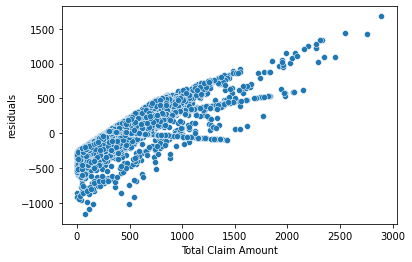

In [24]:
residuals = y - predictions

plot = sns.scatterplot(y,residuals)
plot.set(xlabel='Total Claim Amount', ylabel='residuals')
plt.show()

<AxesSubplot:xlabel='Total Claim Amount'>

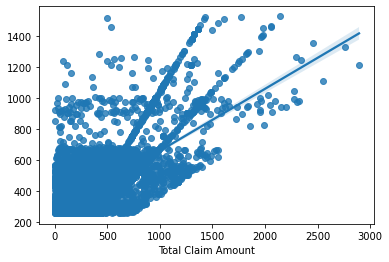

In [25]:
sns.regplot(y, predictions)

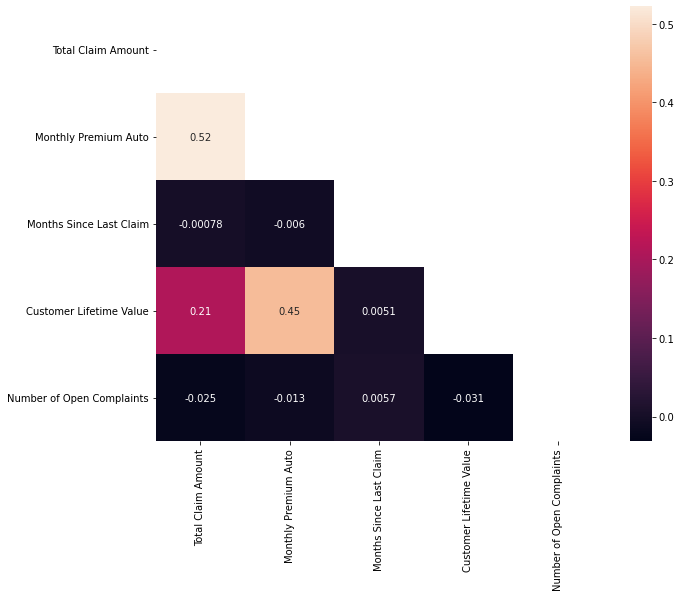

In [30]:
data1 = data[["Total Claim Amount", "Monthly Premium Auto", "Months Since Last Claim", "Customer Lifetime Value", "Number of Open Complaints"]]
corr_data2 = data1.select_dtypes([np.number])
correlations_matrix2 = corr_data2.corr(method='spearman')
mask = np.zeros_like(correlations_matrix2)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix2, mask=mask, annot=True)
plt.show()